# 01. Market Expectations In The Cross-Section Of Present Values

## Imports

In [2]:
import numpy as np
import pandas as pd
import sys

from matplotlib import pyplot as plt
from settings import config
from pathlib import Path
import load_data
import regressions
import pull_CRSP_index
import pull_ken_french_data
import pull_fred

# Load environment variables
DATA_DIR = Path(config("DATA_DIR"))
OUTPUT_DIR = Path(config("OUTPUT_DIR"))
WRDS_USERNAME = config("WRDS_USERNAME")
START_DATE = config("START_DATE")
END_DATE = config("END_DATE")

## Prep Data

### Step 1: Fama-French Data

In [3]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [4]:
bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")

/var/folders/2x/7fvzj1k120sdhjm0x4grzjbc0000gp/T/ipykernel_33279/3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")
/var/folders/2x/7fvzj1k120sdhjm0x4grzjbc0000gp/T/ipykernel_33279/3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")
/var/folders/2x/7fvzj1k120sdhjm0x4grzjbc0000gp/T/ipykernel_33279/3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios =

In [5]:
print(bm_6_portfolios['DESCR'])

6 Portfolios 2x3
----------------

This file was created by CMPT_ME_BEME_OP_INV_RETS using the 202412 CRSP database. It contains value- and equal-weighted returns for portfolios formed on ME and BEME. The portfolios are constructed at the end of June. BEME is book value at the last fiscal year end of the prior calendar year divided by ME at the end of December of the prior year. Annual returns are from January to December. Missing data are indicated by -99.99 or -999. The break points include utilities and include financials. The portfolios include utilities and include financials. Copyright 2024 Eugene F. Fama and Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (58 rows x 6 cols)
  1 : Average Equal Weighted Returns -- Monthly (58 rows x 6 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 6 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 6 cols)
  4 : Number of Firms in Portfolios (58 rows x 6 cols)
  5 : Average Market Cap (58 rows x 6 c

In [6]:
bm_6_portfolios[6].head()

,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
Date,,,,,,
2020-03,0.1810,0.5313,1.1804,0.1574,0.5496,1.0957
2020-04,0.1813,0.5308,1.1705,0.1569,0.5448,1.0928
2020-05,0.1792,0.5297,1.1856,0.1561,0.5449,1.0953
2020-06,0.1792,0.5280,1.1877,0.1560,0.5418,1.1002
2020-07,0.1642,0.4626,1.1351,0.1252,0.4527,0.8969


### Step 2: CRSP Market Capitalization Weighted Index Data

In [7]:
# crsp = pull_CRSP_index.pull_crsp_value_weighted_index()

In [8]:
crsp_loaded = load_data.load_crsp_index()
crsp_loaded

,date,value_weighted_return
0,1930-02-01,0.058407
1,1930-03-01,0.028242
2,1930-04-01,0.074631
3,1930-05-01,-0.020541
4,1930-06-01,-0.014010
...,...,...
1123,2023-09-01,-0.020608
1124,2023-10-01,-0.047391
1125,2023-11-01,-0.028865
1126,2023-12-01,0.092053


### Step 3: Risk-Free Rate Data

In [9]:
# rf = pull_fred.pull_fred()
# rf

In [10]:
rf_monthly = load_data.load_fred_data()
rf_monthly

DATE
1930-01-01    0.000000
1930-02-01    0.000000
1930-03-01    0.000000
1930-04-01    0.000000
1930-05-01    0.000000
                ...   
2023-09-01    0.004433
2023-10-01    0.004450
2023-11-01    0.004392
2023-12-01    0.004367
2024-01-01    0.004350
Name: TB3MS, Length: 1129, dtype: float64

### Step 4: Excess Returns

In [11]:
ex_ret = load_data.load_and_compute_excess_returns()
ex_ret

1930-02-01    0.058407
1930-03-01    0.028242
1930-04-01    0.074631
1930-05-01   -0.020541
1930-06-01   -0.014010
                ...   
2023-09-01   -0.025041
2023-10-01   -0.051841
2023-11-01   -0.033257
2023-12-01    0.087686
2024-01-01    0.049254
Length: 1128, dtype: float64

# Run Regressions

In [12]:
import importlib
importlib.reload(load_data)

<module 'load_data' from '/Users/Ilya/Desktop/School/The University of Chicago/Full Stack/Git/finm32900_project_group6/src/load_data.py'>

In [13]:
# def regress():
#     portfolio_datasets = {
#         "6-Portfolios": "6_Portfolios_2x3",
#         "25-Portfolios": "25_Portfolios_5x5",
#         "100-Portfolios": "100_Portfolios_10x10"
#     }
#     results = {}
#     for label, dataset_name in portfolio_datasets.items():
#         print(f"\nProcessing {label} Data")
#         in_sample = regressions.run_in_sample_pls(dataset_name, weighting="value-weighted", h=1)
#         recursive = regressions.run_recursive_forecast(dataset_name, weighting="value-weighted", h=1)
#         regressions.display_results(label, in_sample, recursive)
#         results[label] = {"in_sample": in_sample, "recursive": recursive}
#     return results

# regress()

# Run Regressions for B/M ratios


Processing 100-Portfolios Data
Aligned data from 1930-02-01 to 2024-01-01
Number of dates: 1128
Date range: 1930-02-01 to 1980-01-01
Number of dates: 600
Date range: 1930-02-01 to 1980-01-01
Number of dates: 600
First-Stage Estimated Loadings (phi_i):
SMALL LoBM: 4.9431
ME1 BM2: 61.2086
ME1 BM3: -21.6408
ME1 BM4: -15.2592
ME1 BM5: 36.4076
ME1 BM6: 28.8957
ME1 BM7: 4.0217
ME1 BM8: 7.4035
ME1 BM9: 6.7142
SMALL HiBM: 18.3688
ME2 BM1: -30.8500
ME2 BM2: 23.2190
ME2 BM3: -10.0208
ME2 BM4: 0.6813
ME2 BM5: 2.8427
ME2 BM6: 1.7347
ME2 BM7: 4.2199
ME2 BM8: 3.8828
ME2 BM9: 4.3440
ME2 BM10: 18.9077
ME3 BM1: -8.4765
ME3 BM2: 17.7380
ME3 BM3: -24.4292
ME3 BM4: 18.1053
ME3 BM5: 1.5113
ME3 BM6: 1.9962
ME3 BM7: 4.1804
ME3 BM8: 3.6258
ME3 BM9: 5.1141
ME3 BM10: 11.6519
ME4 BM1: -8.0688
ME4 BM2: 0.6786
ME4 BM3: 0.9039
ME4 BM4: 1.6733
ME4 BM5: 1.5020
ME4 BM6: 2.0452
ME4 BM7: 2.4399
ME4 BM8: 3.7759
ME4 BM9: 5.3301
ME4 BM10: 17.8882
ME5 BM1: 27.0896
ME5 BM2: 0.6822
ME5 BM3: 1.1894
ME5 BM4: 1.1849
ME5 BM5: 1.

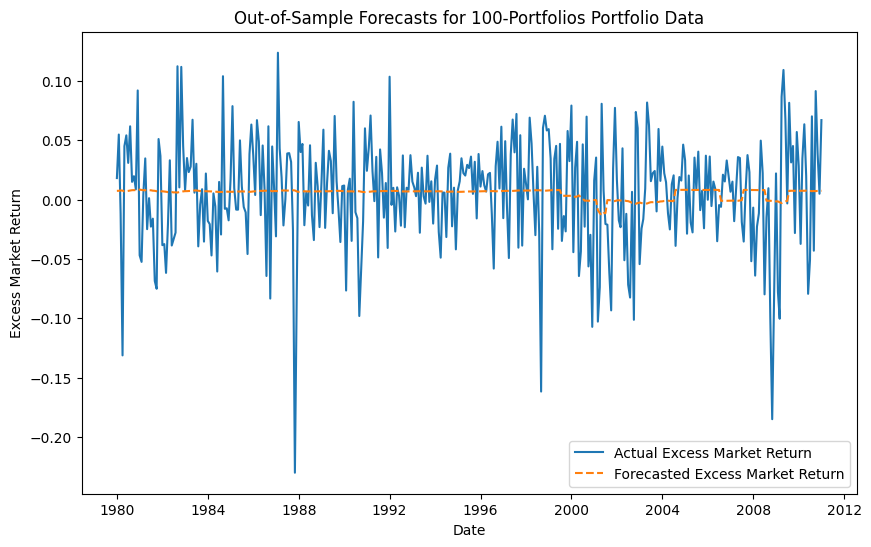

{'100-Portfolios': {'in_sample': {'phi': {'SMALL LoBM': 4.943052500192864,
    'ME1 BM2': 61.208567440663636,
    'ME1 BM3': -21.640758042575765,
    'ME1 BM4': -15.259240563252032,
    'ME1 BM5': 36.40756396151552,
    'ME1 BM6': 28.89573282520181,
    'ME1 BM7': 4.021714945097824,
    'ME1 BM8': 7.40349887218379,
    'ME1 BM9': 6.714175244549553,
    'SMALL HiBM': 18.368825085375775,
    'ME2 BM1': -30.849974975594396,
    'ME2 BM2': 23.218993173173903,
    'ME2 BM3': -10.020790941735699,
    'ME2 BM4': 0.6813190838166442,
    'ME2 BM5': 2.8426841823319924,
    'ME2 BM6': 1.7346939779964834,
    'ME2 BM7': 4.219853194664114,
    'ME2 BM8': 3.882820223319792,
    'ME2 BM9': 4.344028550936613,
    'ME2 BM10': 18.907724785363325,
    'ME3 BM1': -8.476523084953893,
    'ME3 BM2': 17.73801972160728,
    'ME3 BM3': -24.429153538785435,
    'ME3 BM4': 18.105308006457733,
    'ME3 BM5': 1.5113132386736674,
    'ME3 BM6': 1.9962234952832891,
    'ME3 BM7': 4.180353198089005,
    'ME3 BM8': 3.

In [14]:
def regress():
    portfolio_datasets = {
        # "6-Portfolios": "6_Portfolios_2x3",
        # "25-Portfolios": "25_Portfolios_5x5",
        "100-Portfolios": "100_Portfolios_10x10"
    }
    results = {}
    for label, dataset_name in portfolio_datasets.items():
        print(f"\nProcessing {label} Data")
        in_sample = regressions.run_in_sample_pls(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=7, 
            end_date='1980-01-01')
        recursive = regressions.run_recursive_forecast(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=7, 
            start_train_date='1930-02-01', 
            end_train_date='1980-01-01',
            end_forecast_date='2011-01-01')
        regressions.display_results(label, in_sample, recursive)
        results[label] = {"in_sample": in_sample, "recursive": recursive}
    return results

regress()

# Alternate Implementation - Monthly Returns

## Step 1: Load Data


In [15]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

end_data_date = "2011-01-01"

# Load Book-to-Market Ratio Data
bm_6 = load_data.load_ken_french("6_Portfolios_2x3", weighting="BE_FYt-1_to_ME_June_t").set_index("Date")
bm_6 = bm_6[bm_6.index <= end_data_date]
bm_25 = load_data.load_ken_french("25_Portfolios_5x5", weighting="BE_FYt-1_to_ME_June_t").set_index("Date")
bm_25 = bm_25[bm_25.index <= end_data_date]
bm_100 = load_data.load_ken_french("100_Portfolios_10x10", weighting="BE_FYt-1_to_ME_June_t").set_index("Date")
bm_100 = bm_100[bm_100.index <= end_data_date]
bm_6

,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
Date,,,,,,
1930-01-01,0.3712,0.8187,2.4928,0.2347,0.6657,1.2921
1930-02-01,0.3703,0.8226,2.5153,0.2340,0.6652,1.2914
1930-03-01,0.3726,0.8214,2.5149,0.2332,0.6596,1.2903
1930-04-01,0.3686,0.8272,2.5144,0.2326,0.6611,1.2897
1930-05-01,0.3662,0.8265,2.4851,0.2316,0.6610,1.2899
...,...,...,...,...,...,...
2010-09-01,0.2659,0.6279,1.2960,0.2683,0.6393,1.1218
2010-10-01,0.2653,0.6289,1.2915,0.2679,0.6405,1.1259
2010-11-01,0.2666,0.6277,1.2875,0.2678,0.6407,1.1248


In [16]:
# Load Market Returns and Compute Excess Returns
market_returns = load_data.load_crsp_index()
market_returns.rename(columns={"date": "Date", "value_weighted_return": "Market Return"}, inplace=True)
market_returns.set_index("Date", inplace=True)
market_returns

,Market Return
Date,
1930-02-01,0.058407
1930-03-01,0.028242
1930-04-01,0.074631
1930-05-01,-0.020541
1930-06-01,-0.014010
...,...
2023-09-01,-0.020608
2023-10-01,-0.047391
2023-11-01,-0.028865


In [17]:
rf_monthly = load_data.load_fred_data()
rf_monthly

DATE
1930-01-01    0.000000
1930-02-01    0.000000
1930-03-01    0.000000
1930-04-01    0.000000
1930-05-01    0.000000
                ...   
2023-09-01    0.004433
2023-10-01    0.004450
2023-11-01    0.004392
2023-12-01    0.004367
2024-01-01    0.004350
Name: TB3MS, Length: 1129, dtype: float64

In [18]:
market_returns["Risk-Free Rate"] = rf_monthly
market_returns

,Market Return,Risk-Free Rate
Date,,
1930-02-01,0.058407,0.000000
1930-03-01,0.028242,0.000000
1930-04-01,0.074631,0.000000
1930-05-01,-0.020541,0.000000
1930-06-01,-0.014010,0.000000
...,...,...
2023-09-01,-0.020608,0.004433
2023-10-01,-0.047391,0.004450
2023-11-01,-0.028865,0.004392


In [19]:
# Calc excess return
market_returns["Excess Return"] = market_returns["Market Return"] - market_returns["Risk-Free Rate"]

# Shift excess return by 7 months, to align observed B/M ratio of t in June of t+1, and excess return the following month
market_returns['Excess Return - Shifted'] = market_returns['Excess Return'].shift(-7)

# Compute rolling annualized excess return
market_returns['Excess Return - Shifted Annualized Rolling'] = (1 + market_returns["Excess Return - Shifted"]).rolling(window=12).apply(lambda x: x.prod()) - 1

# Shift rolling annualized excess return by 12 months to align observed B/M ratio of t in June of t+1, and excess annual return from the following year
market_returns['Excess Return - Shifted Annualized Rolling, Shifted'] = market_returns['Excess Return - Shifted Annualized Rolling'].shift(-12)

# Cut off data in 2011
market_returns = market_returns[market_returns.index <= end_data_date]
market_returns.tail(15)

,Market Return,Risk-Free Rate,Excess Return,Excess Return - Shifted,Excess Return - Shifted Annualized Rolling,"Excess Return - Shifted Annualized Rolling, Shifted"
Date,,,,,,
2009-11-01,-0.028072,0.000042,-0.028114,-0.079340,0.221568,0.270622
2009-12-01,0.057075,0.000042,0.057033,-0.050913,0.163060,0.314043
2010-01-01,0.028475,0.000050,0.028425,0.070227,0.150790,0.200130
2010-02-01,-0.037172,0.000092,-0.037264,-0.042988,0.067781,0.181840
2010-03-01,0.034744,0.000125,0.034619,0.091520,0.115077,-0.009286
2010-04-01,0.063668,0.000133,0.063535,0.038474,0.191476,0.062898
2010-05-01,0.020036,0.000133,0.019903,0.005000,0.132825,0.050969
2010-06-01,-0.079240,0.000100,-0.079340,0.067057,0.175378,-0.011481
2010-07-01,-0.050780,0.000133,-0.050913,0.019075,0.244160,0.022428


In [20]:
market_returns_in_sample = market_returns[market_returns.index <= "1980-01-01"]
market_returns_in_sample

,Market Return,Risk-Free Rate,Excess Return,Excess Return - Shifted,Excess Return - Shifted Annualized Rolling,"Excess Return - Shifted Annualized Rolling, Shifted"
Date,,,,,,
1930-02-01,0.058407,0.000000,0.058407,0.003663,NaN,-0.340253
1930-03-01,0.028242,0.000000,0.028242,-0.124805,NaN,-0.466086
1930-04-01,0.074631,0.000000,0.074631,-0.086579,NaN,-0.367835
1930-05-01,-0.020541,0.000000,-0.020541,-0.028057,NaN,-0.407084
1930-06-01,-0.014010,0.000000,-0.014010,-0.077739,NaN,-0.443879
...,...,...,...,...,...,...
1979-09-01,0.064732,0.008550,0.056182,-0.131224,-0.042952,0.290828
1979-10-01,0.001426,0.009750,-0.008324,0.045137,-0.000265,0.204389
1979-11-01,-0.072662,0.009825,-0.082487,0.054199,0.076660,0.143920


In [21]:
# Ensure all data is aligned on the Date index
bm_6 = bm_6.loc[market_returns.index]
bm_25 = bm_25.loc[market_returns.index]
bm_100 = bm_100.loc[market_returns.index]

# Select different portfolio sizes for processing
bm_dict = {"6 Portfolios": bm_6, "25 Portfolios": bm_25, "100 Portfolios": bm_100}
bm_dict

{'6 Portfolios':             SMALL LoBM  ME1 BM2  SMALL HiBM  BIG LoBM  ME2 BM2  BIG HiBM
 Date                                                                    
 1930-02-01      0.3703   0.8226      2.5153    0.2340   0.6652    1.2914
 1930-03-01      0.3726   0.8214      2.5149    0.2332   0.6596    1.2903
 1930-04-01      0.3686   0.8272      2.5144    0.2326   0.6611    1.2897
 1930-05-01      0.3662   0.8265      2.4851    0.2316   0.6610    1.2899
 1930-06-01      0.3647   0.8240      2.4542    0.2327   0.6610    1.2865
 ...                ...      ...         ...       ...      ...       ...
 2010-09-01      0.2659   0.6279      1.2960    0.2683   0.6393    1.1218
 2010-10-01      0.2653   0.6289      1.2915    0.2679   0.6405    1.1259
 2010-11-01      0.2666   0.6277      1.2875    0.2678   0.6407    1.1248
 2010-12-01      0.2680   0.6276      1.2760    0.2682   0.6394    1.1224
 2011-01-01      0.2684   0.6303      1.2777    0.2689   0.6416    1.1366
 
 [972 rows x 6 colum

In [22]:
# Ensure all data is aligned on the Date index
bm_6_in_sample = bm_6.loc[market_returns_in_sample.index]
bm_25_in_sample = bm_25.loc[market_returns_in_sample.index]
bm_100_in_sample = bm_100.loc[market_returns_in_sample.index]

# Select different portfolio sizes for processing
bm_dict_in_sample = {"6 Portfolios In Sample": bm_6_in_sample, 
                     "25 Portfolios In Sample": bm_25_in_sample, 
                     "100 Portfolios In Sample": bm_100_in_sample}
bm_dict_in_sample

{'6 Portfolios In Sample':             SMALL LoBM  ME1 BM2  SMALL HiBM  BIG LoBM  ME2 BM2  BIG HiBM
 Date                                                                    
 1930-02-01      0.3703   0.8226      2.5153    0.2340   0.6652    1.2914
 1930-03-01      0.3726   0.8214      2.5149    0.2332   0.6596    1.2903
 1930-04-01      0.3686   0.8272      2.5144    0.2326   0.6611    1.2897
 1930-05-01      0.3662   0.8265      2.4851    0.2316   0.6610    1.2899
 1930-06-01      0.3647   0.8240      2.4542    0.2327   0.6610    1.2865
 ...                ...      ...         ...       ...      ...       ...
 1979-09-01      0.4655   1.0421      1.7298    0.5332   1.0922    1.7187
 1979-10-01      0.4622   1.0405      1.7218    0.5343   1.0891    1.7156
 1979-11-01      0.4630   1.0386      1.7197    0.5332   1.0879    1.7103
 1979-12-01      0.4551   1.0350      1.7146    0.5328   1.0849    1.6953
 1980-01-01      0.4491   1.0302      1.7091    0.5334   1.0833    1.7003
 
 [600 rows

## Step 2: Implement the PLS Regression

In [23]:
def compute_pls_predictor(X, y, n_components=1):
    """
    Compute the PLS predictor factor from a cross-section of book-to-market ratios.
    X: Book-to-market ratios (DataFrame)
    y: Excess market returns (Series)
    """
    pls = PLSRegression(n_components=n_components)
    pls.fit(X, y)
    factor = pls.transform(X)  # Extract the PLS factor
    return factor.flatten()  # Convert to 1D array

def predictive_regression(factor, excess_returns):
    """
    Run a predictive regression: Excess market returns ~ Extracted PLS Factor
    """
    X = sm.add_constant(factor)
    model = sm.OLS(excess_returns, X).fit()
    return model

# Store results
results = {}

for name, bm_data in bm_dict_in_sample.items():
    print(f"\nRunning PLS + Regression for {name}")

    # Extract PLS factor
    pls_factor = compute_pls_predictor(bm_data, market_returns_in_sample["Excess Return - Shifted"])
    # pls_df = pd.DataFrame(pls_factor, columns=["PLS Factor"])
    # print(pls_df)

    # Run predictive regression
    # model = predictive_regression(pls_factor[:-1], market_returns_in_sample["Excess Return"].iloc[1:])  # Shift for forecasting
    model = predictive_regression(pls_factor, market_returns_in_sample["Excess Return - Shifted"])  # Data already shifted

    # Store results
    results[name] = {
        "R2 In-Sample": model.rsquared,
        "Model Summary": model.summary()
    }

    print(f"R2 In-Sample for {name}: {model.rsquared:.4f}")



Running PLS + Regression for 6 Portfolios In Sample
R2 In-Sample for 6 Portfolios In Sample: 0.0177

Running PLS + Regression for 25 Portfolios In Sample
R2 In-Sample for 25 Portfolios In Sample: 0.0165

Running PLS + Regression for 100 Portfolios In Sample
R2 In-Sample for 100 Portfolios In Sample: 0.0195


## Step 3: Compute Out-of-Sample Predictions (Recursive Forecast)


In [24]:
import numpy as np
import statsmodels.api as sm

def out_of_sample_forecast(X, y, split_date):
    """
    Perform a rolling out-of-sample forecast using PLS regression.
    X: Book-to-market ratios (features)
    y: Excess market returns (target)
    split_date: Date at which training ends and forecasting begins
    """
    train_mask = X.index < split_date
    test_mask = X.index >= split_date

    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]
    # print(y_test) # This should be 1980 - 2011 or 1980 - current

    # Train PLS on pre-1980 data
    pls_factor_train = compute_pls_predictor(X_train, y_train)

    # Ensure y_train matches the shape of extracted factors
    y_train = y_train.iloc[:len(pls_factor_train)]  

    # Initial predictive regression
    X_train_const = sm.add_constant(pls_factor_train)
    model = sm.OLS(y_train, X_train_const).fit()

    # Rolling Forecast
    predictions = []
    actuals = []

    for i in range(len(X_test)):
        # Expanding window approach
        X_train_curr = X.iloc[:len(y_train) + i]
        y_train_curr = y.iloc[:len(y_train) + i]
        # print(f"Shape of y_train_curr: {y_train_curr.shape}")

        # Extract PLS factor for new training window
        pls_factor = compute_pls_predictor(X_train_curr, y_train_curr)
        # print(f"Shape of PLS Factor: {pls_factor.shape}")
        # print(pls_factor)

        # Ensure sizes match
        y_train_curr = y_train_curr.iloc[:len(pls_factor)]
        # print(f"Shape of y_train_curr: {y_train_curr.shape}")

        # Fit predictive regression with expanding window
        X_train_curr = sm.add_constant(pls_factor)
        model = sm.OLS(y_train_curr, X_train_curr).fit()
        # print(f"Shape of X_train_curr: {X_train_curr.shape}")
        # print(f"X_train_curr: {X_train_curr}")

        # **Final Fix: Ensure Shape (1,2)**
        # X_curr = sm.add_constant(np.array([[pls_factor[-1]]]))  # Fix: no indexing, just reshape
        X_curr = sm.add_constant(np.array([pls_factor])[-1])  # Fix: no indexing, just reshape
        # print(f"Shape of X_curr: {X_curr.shape}")
        # print(f"X_curr: {X_curr}")



        # print(f"\nIteration {i+1}")
        # print(f"Final Fixed Shape of X_curr: {X_curr.shape}")  # Should be (1,2)
        # print(f"Shape of model.params: {model.params.shape}")  # Should be (2,)

        # Prediction
        prediction = model.predict(X_curr)[0]  # Ensure single value is returned
        # prediction = model.predict(X_curr)  # Ensure single value is returned
        # print(f"Prediction: {prediction}")
        predictions.append(prediction)
        # print(f"y test {y_test.iloc[i]}")
        actuals.append(y_test.iloc[i])

    # Convert lists to numpy arrays
    # print(len(actuals))
    # print(actuals)
    actuals = np.array(actuals)
    
    # print(len(predictions))
    # print(predictions)
    # predictions = np.array(predictions)
    

    # Compute Out-of-Sample R²
    r2_out_sample = 1 - np.sum((actuals - predictions) ** 2) / np.sum((actuals - np.mean(actuals)) ** 2)

    return r2_out_sample


split_date = "1980-01-01"

for name, bm_data in bm_dict.items():
    print(f"\nRunning Out-of-Sample Forecast for {name}")

    # Compute Out-of-Sample R²
    # r2_out_sample = out_of_sample_forecast(bm_data, market_returns["Excess Return"], split_date)
    r2_out_sample = out_of_sample_forecast(bm_data, market_returns["Excess Return - Shifted"], split_date)

    # Ensure there's an entry for this dataset
    if name not in results:
        results[name] = {}

    # Store Out-of-Sample R²
    results[name]["R2 Out-of-Sample"] = r2_out_sample

    print(f"R2 Out-of-Sample for {name}: {r2_out_sample:.4f}")



Running Out-of-Sample Forecast for 6 Portfolios
R2 Out-of-Sample for 6 Portfolios: -0.0062

Running Out-of-Sample Forecast for 25 Portfolios
R2 Out-of-Sample for 25 Portfolios: -0.0055

Running Out-of-Sample Forecast for 100 Portfolios
R2 Out-of-Sample for 100 Portfolios: -0.0123


## Step 4: Report Results (Comparison to Table 1)


In [25]:
import pandas as pd


# Create a DataFrame to summarize results
summary_df = pd.DataFrame(results).T[['R2 In-Sample', 'R2 Out-of-Sample']]
summary_df.columns = ["In-Sample R2", "Out-of-Sample R2"]

# Display the results
summary_df

,In-Sample R2,Out-of-Sample R2
6 Portfolios In Sample,0.017744,NaN
25 Portfolios In Sample,0.016459,NaN
100 Portfolios In Sample,0.019472,NaN
6 Portfolios,NaN,-0.006179
25 Portfolios,NaN,-0.005535
100 Portfolios,NaN,-0.012337


In [26]:
summary_tex_path = "../reports/tables/summary_table.tex"
summary_df.to_latex(summary_tex_path, index=True, float_format="%.6f")

# Alternate Implementation - Annual Rolling Returns

## Step 1: Load Data


In [27]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

end_data_date = "2011-01-01"

# Load Book-to-Market Ratio Data
bm_6 = load_data.load_ken_french("6_Portfolios_2x3", weighting="BE_FYt-1_to_ME_June_t").set_index("Date")
bm_6 = bm_6[bm_6.index <= end_data_date]
bm_25 = load_data.load_ken_french("25_Portfolios_5x5", weighting="BE_FYt-1_to_ME_June_t").set_index("Date")
bm_25 = bm_25[bm_25.index <= end_data_date]
bm_100 = load_data.load_ken_french("100_Portfolios_10x10", weighting="BE_FYt-1_to_ME_June_t").set_index("Date")
bm_100 = bm_100[bm_100.index <= end_data_date]
bm_6

,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
Date,,,,,,
1930-01-01,0.3712,0.8187,2.4928,0.2347,0.6657,1.2921
1930-02-01,0.3703,0.8226,2.5153,0.2340,0.6652,1.2914
1930-03-01,0.3726,0.8214,2.5149,0.2332,0.6596,1.2903
1930-04-01,0.3686,0.8272,2.5144,0.2326,0.6611,1.2897
1930-05-01,0.3662,0.8265,2.4851,0.2316,0.6610,1.2899
...,...,...,...,...,...,...
2010-09-01,0.2659,0.6279,1.2960,0.2683,0.6393,1.1218
2010-10-01,0.2653,0.6289,1.2915,0.2679,0.6405,1.1259
2010-11-01,0.2666,0.6277,1.2875,0.2678,0.6407,1.1248


In [28]:
# Load Market Returns and Compute Excess Returns
market_returns = load_data.load_crsp_index()
market_returns.rename(columns={"date": "Date", "value_weighted_return": "Market Return"}, inplace=True)
market_returns.set_index("Date", inplace=True)
market_returns

,Market Return
Date,
1930-02-01,0.058407
1930-03-01,0.028242
1930-04-01,0.074631
1930-05-01,-0.020541
1930-06-01,-0.014010
...,...
2023-09-01,-0.020608
2023-10-01,-0.047391
2023-11-01,-0.028865


In [29]:
rf_monthly = load_data.load_fred_data()
rf_monthly

DATE
1930-01-01    0.000000
1930-02-01    0.000000
1930-03-01    0.000000
1930-04-01    0.000000
1930-05-01    0.000000
                ...   
2023-09-01    0.004433
2023-10-01    0.004450
2023-11-01    0.004392
2023-12-01    0.004367
2024-01-01    0.004350
Name: TB3MS, Length: 1129, dtype: float64

In [30]:
market_returns["Risk-Free Rate"] = rf_monthly
market_returns

,Market Return,Risk-Free Rate
Date,,
1930-02-01,0.058407,0.000000
1930-03-01,0.028242,0.000000
1930-04-01,0.074631,0.000000
1930-05-01,-0.020541,0.000000
1930-06-01,-0.014010,0.000000
...,...,...
2023-09-01,-0.020608,0.004433
2023-10-01,-0.047391,0.004450
2023-11-01,-0.028865,0.004392


In [31]:
# Calc excess return
market_returns["Excess Return"] = market_returns["Market Return"] - market_returns["Risk-Free Rate"]

# Shift excess return by 7 months, to align observed B/M ratio of t in June of t+1, and excess return the following month
market_returns['Excess Return - Shifted'] = market_returns['Excess Return'].shift(-7)

# Compute rolling annualized excess return
market_returns['Excess Return - Shifted Annualized Rolling'] = (1 + market_returns["Excess Return - Shifted"]).rolling(window=12).apply(lambda x: x.prod()) - 1

# Shift rolling annualized excess return by 12 months to align observed B/M ratio of t in June of t+1, and excess annual return from the following year
market_returns['Excess Return - Shifted Annualized Rolling, Shifted'] = market_returns['Excess Return - Shifted Annualized Rolling'].shift(-12)

# Cut off data in 2011
market_returns = market_returns[market_returns.index <= end_data_date]
market_returns.tail(15)

,Market Return,Risk-Free Rate,Excess Return,Excess Return - Shifted,Excess Return - Shifted Annualized Rolling,"Excess Return - Shifted Annualized Rolling, Shifted"
Date,,,,,,
2009-11-01,-0.028072,0.000042,-0.028114,-0.079340,0.221568,0.270622
2009-12-01,0.057075,0.000042,0.057033,-0.050913,0.163060,0.314043
2010-01-01,0.028475,0.000050,0.028425,0.070227,0.150790,0.200130
2010-02-01,-0.037172,0.000092,-0.037264,-0.042988,0.067781,0.181840
2010-03-01,0.034744,0.000125,0.034619,0.091520,0.115077,-0.009286
2010-04-01,0.063668,0.000133,0.063535,0.038474,0.191476,0.062898
2010-05-01,0.020036,0.000133,0.019903,0.005000,0.132825,0.050969
2010-06-01,-0.079240,0.000100,-0.079340,0.067057,0.175378,-0.011481
2010-07-01,-0.050780,0.000133,-0.050913,0.019075,0.244160,0.022428


In [32]:
market_returns_in_sample = market_returns[market_returns.index <= "1980-01-01"]
market_returns_in_sample

,Market Return,Risk-Free Rate,Excess Return,Excess Return - Shifted,Excess Return - Shifted Annualized Rolling,"Excess Return - Shifted Annualized Rolling, Shifted"
Date,,,,,,
1930-02-01,0.058407,0.000000,0.058407,0.003663,NaN,-0.340253
1930-03-01,0.028242,0.000000,0.028242,-0.124805,NaN,-0.466086
1930-04-01,0.074631,0.000000,0.074631,-0.086579,NaN,-0.367835
1930-05-01,-0.020541,0.000000,-0.020541,-0.028057,NaN,-0.407084
1930-06-01,-0.014010,0.000000,-0.014010,-0.077739,NaN,-0.443879
...,...,...,...,...,...,...
1979-09-01,0.064732,0.008550,0.056182,-0.131224,-0.042952,0.290828
1979-10-01,0.001426,0.009750,-0.008324,0.045137,-0.000265,0.204389
1979-11-01,-0.072662,0.009825,-0.082487,0.054199,0.076660,0.143920


In [33]:
# Ensure all data is aligned on the Date index
bm_6 = bm_6.loc[market_returns.index]
bm_25 = bm_25.loc[market_returns.index]
bm_100 = bm_100.loc[market_returns.index]

# Select different portfolio sizes for processing
bm_dict = {"6 Portfolios": bm_6, "25 Portfolios": bm_25, "100 Portfolios": bm_100}
bm_dict

{'6 Portfolios':             SMALL LoBM  ME1 BM2  SMALL HiBM  BIG LoBM  ME2 BM2  BIG HiBM
 Date                                                                    
 1930-02-01      0.3703   0.8226      2.5153    0.2340   0.6652    1.2914
 1930-03-01      0.3726   0.8214      2.5149    0.2332   0.6596    1.2903
 1930-04-01      0.3686   0.8272      2.5144    0.2326   0.6611    1.2897
 1930-05-01      0.3662   0.8265      2.4851    0.2316   0.6610    1.2899
 1930-06-01      0.3647   0.8240      2.4542    0.2327   0.6610    1.2865
 ...                ...      ...         ...       ...      ...       ...
 2010-09-01      0.2659   0.6279      1.2960    0.2683   0.6393    1.1218
 2010-10-01      0.2653   0.6289      1.2915    0.2679   0.6405    1.1259
 2010-11-01      0.2666   0.6277      1.2875    0.2678   0.6407    1.1248
 2010-12-01      0.2680   0.6276      1.2760    0.2682   0.6394    1.1224
 2011-01-01      0.2684   0.6303      1.2777    0.2689   0.6416    1.1366
 
 [972 rows x 6 colum

### Convert to annual ratios - Full Sample

In [34]:
# # Resample: Take the last available observation in each year
# bm_6_annual = bm_6.resample('YE').last()
# bm_25_annual = bm_25.resample('YE').last()
# bm_100_annual = bm_100.resample('YE').last()

# bm_dict_annual = {"6 Portfolios - Annual": bm_6_annual, 
#                   "25 Portfolios - Annual": bm_25_annual, 
#                   "100 Portfolios - Annual": bm_100_annual}
# bm_dict_annual

In [35]:
# Ensure all data is aligned on the Date index
bm_6_in_sample = bm_6.loc[market_returns_in_sample.index]
bm_25_in_sample = bm_25.loc[market_returns_in_sample.index]
bm_100_in_sample = bm_100.loc[market_returns_in_sample.index]

# Select different portfolio sizes for processing
bm_dict_in_sample = {"6 Portfolios In Sample": bm_6_in_sample, 
                     "25 Portfolios In Sample": bm_25_in_sample, 
                     "100 Portfolios In Sample": bm_100_in_sample}
bm_dict_in_sample

{'6 Portfolios In Sample':             SMALL LoBM  ME1 BM2  SMALL HiBM  BIG LoBM  ME2 BM2  BIG HiBM
 Date                                                                    
 1930-02-01      0.3703   0.8226      2.5153    0.2340   0.6652    1.2914
 1930-03-01      0.3726   0.8214      2.5149    0.2332   0.6596    1.2903
 1930-04-01      0.3686   0.8272      2.5144    0.2326   0.6611    1.2897
 1930-05-01      0.3662   0.8265      2.4851    0.2316   0.6610    1.2899
 1930-06-01      0.3647   0.8240      2.4542    0.2327   0.6610    1.2865
 ...                ...      ...         ...       ...      ...       ...
 1979-09-01      0.4655   1.0421      1.7298    0.5332   1.0922    1.7187
 1979-10-01      0.4622   1.0405      1.7218    0.5343   1.0891    1.7156
 1979-11-01      0.4630   1.0386      1.7197    0.5332   1.0879    1.7103
 1979-12-01      0.4551   1.0350      1.7146    0.5328   1.0849    1.6953
 1980-01-01      0.4491   1.0302      1.7091    0.5334   1.0833    1.7003
 
 [600 rows

### Convert to annual returns - Full sample

In [36]:
# # Annual Market Return (Cumulative Product for Total Return)
# market_returns['Market Return'] = market_returns['Market Return'] + 1  # Convert to growth factor
# market_returns

In [37]:
# annual_market_return = market_returns['Market Return'].resample('YE').prod() - 1  # Convert back to returns

# # Annual Risk-Free Rate (Sum of Monthly Rates)
# annual_risk_free_rate = market_returns['Risk-Free Rate'].resample('YE').sum()

# # Compute Annual Excess Return
# annual_excess_return = annual_market_return - annual_risk_free_rate

# # Create New Annual DataFrame
# annual_returns = pd.DataFrame({
#     "Market Return": annual_market_return,
#     "Risk-Free Rate": annual_risk_free_rate,
#     "Excess Return": annual_excess_return
# })

# # Adjust index to represent the year (instead of Dec 31st)
# # annual_returns.index = annual_returns.index.year

# # Display the transformed annual data
# annual_returns

In [38]:
# annual_returns_in_sample = annual_returns[annual_returns.index <= "1980-01-01"]
# annual_returns_in_sample

### Convert to annual ratios - In Sample

In [39]:
# # Ensure all data is aligned on the Date index
# bm_6_in_sample_annual = bm_6_annual.loc[annual_returns_in_sample.index]
# bm_25_in_sample_annual = bm_25_annual.loc[annual_returns_in_sample.index]
# bm_100_in_sample_annual = bm_100_annual.loc[annual_returns_in_sample.index]

# # Select different portfolio sizes for processing
# bm_dict_in_sample_annual = {"6 Portfolios - In Sample Annual": bm_6_in_sample_annual, 
#                             "25 Portfolios - In Sampole Annual": bm_25_in_sample_annual, 
#                             "100 Portfolios - In Sample Annual": bm_100_in_sample_annual}
# bm_dict_in_sample_annual

## Step 2: Implement the PLS Regression - Annual

In [40]:
def compute_pls_predictor(X, y, n_components=1):
    """
    Compute the PLS predictor factor from a cross-section of book-to-market ratios.
    X: Book-to-market ratios (DataFrame)
    y: Excess market returns (Series)
    """
    pls = PLSRegression(n_components=n_components)
    pls.fit(X, y)
    factor = pls.transform(X)  # Extract the PLS factor
    return factor.flatten()  # Convert to 1D array

def predictive_regression(factor, excess_returns):
    """
    Run a predictive regression: Excess market returns ~ Extracted PLS Factor
    """
    X = sm.add_constant(factor)
    model = sm.OLS(excess_returns, X).fit()
    return model

# Store results
results = {}

for name, bm_data in bm_dict_in_sample.items():
    print(f"\nRunning PLS + Regression for {name}")

    # Extract PLS factor
    pls_factor = compute_pls_predictor(bm_data, market_returns_in_sample["Excess Return - Shifted Annualized Rolling, Shifted"])
    # pls_df = pd.DataFrame(pls_factor, columns=["PLS Factor"])
    # print(pls_df)

    # Run predictive regression
    # model = predictive_regression(pls_factor[:-1], market_returns_in_sample["Excess Return"].iloc[1:])  # Shift for forecasting
    model = predictive_regression(pls_factor, market_returns_in_sample["Excess Return - Shifted Annualized Rolling, Shifted"])  # Data already shifted

    # Store results
    results[name] = {
        "R2 In-Sample": model.rsquared,
        "Model Summary": model.summary()
    }

    print(f"R2 In-Sample for {name}: {model.rsquared:.4f}")



Running PLS + Regression for 6 Portfolios In Sample
R2 In-Sample for 6 Portfolios In Sample: 0.0545

Running PLS + Regression for 25 Portfolios In Sample
R2 In-Sample for 25 Portfolios In Sample: 0.0507

Running PLS + Regression for 100 Portfolios In Sample
R2 In-Sample for 100 Portfolios In Sample: 0.0688


## Step 3: Compute Out-of-Sample Predictions (Recursive Forecast)


In [41]:
import numpy as np
import statsmodels.api as sm

def out_of_sample_forecast(X, y, split_date):
    """
    Perform a rolling out-of-sample forecast using PLS regression.
    X: Book-to-market ratios (features)
    y: Excess market returns (target)
    split_date: Date at which training ends and forecasting begins
    """
    train_mask = X.index < split_date
    test_mask = X.index >= split_date

    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]
    # print(y_test) # This should be 1980 - 2011 or 1980 - current

    # Train PLS on pre-1980 data
    pls_factor_train = compute_pls_predictor(X_train, y_train)

    # Ensure y_train matches the shape of extracted factors
    y_train = y_train.iloc[:len(pls_factor_train)]  

    # Initial predictive regression
    X_train_const = sm.add_constant(pls_factor_train)
    model = sm.OLS(y_train, X_train_const).fit()

    # Rolling Forecast
    predictions = []
    actuals = []

    for i in range(len(X_test)):
        # Expanding window approach
        X_train_curr = X.iloc[:len(y_train) + i]
        y_train_curr = y.iloc[:len(y_train) + i]
        # print(f"Shape of y_train_curr: {y_train_curr.shape}")

        # Extract PLS factor for new training window
        pls_factor = compute_pls_predictor(X_train_curr, y_train_curr)
        # print(f"Shape of PLS Factor: {pls_factor.shape}")
        # print(pls_factor)

        # Ensure sizes match
        y_train_curr = y_train_curr.iloc[:len(pls_factor)]
        # print(f"Shape of y_train_curr: {y_train_curr.shape}")

        # Fit predictive regression with expanding window
        X_train_curr = sm.add_constant(pls_factor)
        model = sm.OLS(y_train_curr, X_train_curr).fit()
        # print(f"Shape of X_train_curr: {X_train_curr.shape}")
        # print(f"X_train_curr: {X_train_curr}")

        # **Final Fix: Ensure Shape (1,2)**
        # X_curr = sm.add_constant(np.array([[pls_factor[-1]]]))  # Fix: no indexing, just reshape
        X_curr = sm.add_constant(np.array([pls_factor])[-1])  # Fix: no indexing, just reshape
        # print(f"Shape of X_curr: {X_curr.shape}")
        # print(f"X_curr: {X_curr}")



        # print(f"\nIteration {i+1}")
        # print(f"Final Fixed Shape of X_curr: {X_curr.shape}")  # Should be (1,2)
        # print(f"Shape of model.params: {model.params.shape}")  # Should be (2,)

        # Prediction
        prediction = model.predict(X_curr)[0]  # Ensure single value is returned
        # prediction = model.predict(X_curr)  # Ensure single value is returned
        # print(f"Prediction: {prediction}")
        predictions.append(prediction)
        # print(f"y test {y_test.iloc[i]}")
        actuals.append(y_test.iloc[i])

    # Convert lists to numpy arrays
    # print(len(actuals))
    # print(actuals)
    actuals = np.array(actuals)
    
    # print(len(predictions))
    # print(predictions)
    # predictions = np.array(predictions)
    

    # Compute Out-of-Sample R²
    r2_out_sample = 1 - np.sum((actuals - predictions) ** 2) / np.sum((actuals - np.mean(actuals)) ** 2)

    return r2_out_sample


split_date = "1980-01-01"

for name, bm_data in bm_dict.items():
    print(f"\nRunning Out-of-Sample Forecast for {name}")

    # Compute Out-of-Sample R²
    # r2_out_sample = out_of_sample_forecast(bm_data, market_returns["Excess Return"], split_date)
    r2_out_sample = out_of_sample_forecast(bm_data, market_returns["Excess Return - Shifted Annualized Rolling, Shifted"], split_date)

    # Ensure there's an entry for this dataset
    if name not in results:
        results[name] = {}

    # Store Out-of-Sample R²
    results[name]["R2 Out-of-Sample"] = r2_out_sample

    print(f"R2 Out-of-Sample for {name}: {r2_out_sample:.4f}")



Running Out-of-Sample Forecast for 6 Portfolios
R2 Out-of-Sample for 6 Portfolios: -0.0055

Running Out-of-Sample Forecast for 25 Portfolios
R2 Out-of-Sample for 25 Portfolios: -0.0046

Running Out-of-Sample Forecast for 100 Portfolios
R2 Out-of-Sample for 100 Portfolios: -0.0180


## Step 4: Report Results (Comparison to Table 1)


In [42]:
import pandas as pd


# Create a DataFrame to summarize results
summary_df = pd.DataFrame(results).T[['R2 In-Sample', 'R2 Out-of-Sample']]
summary_df.columns = ["In-Sample R2", "Out-of-Sample R2"]

# Display the results
summary_df

,In-Sample R2,Out-of-Sample R2
6 Portfolios In Sample,0.054473,NaN
25 Portfolios In Sample,0.050746,NaN
100 Portfolios In Sample,0.068833,NaN
6 Portfolios,NaN,-0.005525
25 Portfolios,NaN,-0.004582
100 Portfolios,NaN,-0.017974


In [43]:
summary_df.to_csv("../reports/summary_table.csv") 